# SI outbreaks on the Forentine families graph

In this notebook, we compute the exact one-point functions for SI outbreaks on the Florentine families graph [1]. We use analytical methods described in [2], which decomposes the contributions to the spreading into subgraphs of the network. To each subgraph (or, diagram) is associated a function of time and the final result is a sum over all contributing subgraphs in the network. 

The functions for each diagrams can be obtained from integrating the contributions of diagrams with one less edge (the 'parents'), which transition into the sought-after diagram by the rules of the SI dynamics described in [2].  As described in *GeneralCode.ipynb*, we have computed all 80332 possible diagrams with at most ten edges and stored it on file. Any diagram with more than 10 edges has to be computed by first finding the parent diagrams and then performing the integration explicitly. 

The `SI_script.py` contains code which can take any graph as an input and integrate all unknown diagrams which contribute to a given single node expectation value. We will here use this script to compute the exactly the expectation values for the nodes in the Florentine families graph of 15 nodes and 20 edges [1].     

[1] Ronald L. Breiger and Philippa E. Pattison "Cumulated social roles: The duality of persons and their algebras",1 Social Networks, Volume 8, Issue 3, September 1986, Pages 215-256

[2] Wout Merbis and Ivano Lodato. "Logistic growth on networks", (2021)

First load all functions in SI_script.py

In [1]:
run SI_script

SI_script loaded!


Next we initialize the Florentine families graph, such that node labels are integers and node no. 3 (corresponding to the Peruzzi family) is initially informed (or infected)

In [2]:
ff=nx.florentine_families_graph()
A=nx.to_numpy_array(ff)
G=nx.from_numpy_matrix(A)
pat_0=3
N=len(G.nodes)

In [3]:
list(ff.nodes())

['Acciaiuoli',
 'Medici',
 'Castellani',
 'Peruzzi',
 'Strozzi',
 'Barbadori',
 'Ridolfi',
 'Tornabuoni',
 'Albizzi',
 'Salviati',
 'Pazzi',
 'Bischeri',
 'Guadagni',
 'Ginori',
 'Lamberteschi']

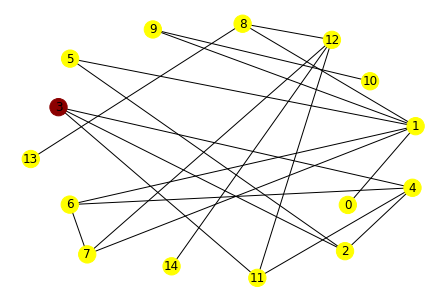

In [4]:
initialize_G(G,[pat_0])
nx.draw(G,node_color=coloring(G),with_labels=True)

Next, the function `compute_tot_op(G,pat_0)` computes the expectation values for all nodes to be informed, given that `pat_0` was informed initially, as a function of time. 

It first constructs a list of all contributing diagrams and organizes this list by the number of edges in the diagrams. Then it constructs all parent diagrams of the subgraphs with more than 10 edges, since these will have to be computed explicitly. It stores the information of parental relationships in a graph of diagrams, where the diagrams are nodes and the parental relationships are (weighted) edges. The edge weights correspond to the sign and coefficient with which the parents transition into the descendant (son) diagram. It uses these relations to perform the integral to compute the sons contribution to the expectation value. Then it sums up all the contributions and outputs the result and a list of the contributing diagrams. This list we write to a new file, such that we can store the computed diagrams for later.

In [5]:
tot_op, tot_pfs = compute_tot_op(G,pat_0)

Computing contributing diagrams
There are 8608 contributing diagrams, computed in 2204.332963705063s
Making list of inequivalent diagrams
There are 4065 inequivalent diagrams
Computing graph of graphs for diagrams at order > 10
Finished 0 diagrams at order 20 in t = 4.76837158203125e-07 s
Finished 0 diagrams at order 19 in t = 2.384185791015625e-07 s
Finished 0 diagrams at order 18 in t = 2.384185791015625e-07 s
Finished 1 diagrams at order 17 in t = 0.003731250762939453 s
Finished 14 diagrams at order 16 in t = 0.043070077896118164 s
Finished 86 diagrams at order 15 in t = 0.600844144821167 s
Finished 336 diagrams at order 14 in t = 9.235921859741211 s
Finished 903 diagrams at order 13 in t = 68.07988214492798 s
Finished 1658 diagrams at order 12 in t = 179.00110459327698 s
Finished 2148 diagrams at order 11 in t = 239.89675498008728 s
GG computed in t=496.8619704246521
There are 7538 diagrams of which 5146 unknown
Looking up known contributions
Looking up order  0
Looking up order  1

In [6]:
write_diagrams_from_ls('diagrams_ff.csv',tot_pfs)

Next we can use the newly created file `diagrams_ff.csv` to look up all the individual expectation values.

In [7]:
op_ls=[]
op_30=lookup_ff_op(G,pat_0,0)
op_ls.append(op_30)

Computing contributing diagrams
There are 562 contributing diagrams, computed in 11.043445110321045s
Making list of inequivalent diagrams
There are 453 inequivalent diagrams
Looking up contributions
Assigned known results to diagrams in 415.56218004226685 seconds
Done! The final result: (20736000*t**5*exp(3*t) + 542592000*t**4*exp(3*t) + 4858128000*t**3*exp(3*t) + 59292000*t**3*exp(2*t) + 3367980000*t**2*exp(4*t) + 21478464000*t**2*exp(3*t) + 315657000*t**2*exp(2*t) + 6220800*t**2*exp(t) + 216000*t**2 + 4041576000*t*exp(4*t) + 51490488000*t*exp(3*t) + 302170500*t*exp(2*t) + 24131520*t*exp(t) + 882000*t + 46656000*exp(7*t) - 330683329*exp(6*t) - 55282675500*exp(4*t) + 55807960000*exp(3*t) - 252507375*exp(2*t) + 10096704*exp(t) + 1153500)*exp(-7*t)/46656000
It took 679.2116253376007 seconds.


In [8]:
op_31=lookup_ff_op(G,pat_0,1)
op_ls.append(op_31)

Computing contributing diagrams
There are 562 contributing diagrams, computed in 10.121138334274292s
Making list of inequivalent diagrams
There are 453 inequivalent diagrams
Looking up contributions
Assigned known results to diagrams in 306.19340324401855 seconds
Done! The final result: -(6912*t**5*exp(3*t) + 169344*t**4*exp(3*t) + 1378224*t**3*exp(3*t) + 26352*t**3*exp(2*t) + 748440*t**2*exp(4*t) + 5540112*t**2*exp(3*t) + 120528*t**2*exp(2*t) + 3456*t**2*exp(t) + 144*t**2 + 149688*t*exp(4*t) + 12390504*t*exp(3*t) + 64152*t*exp(2*t) + 12024*t*exp(t) + 540*t - 5184*exp(7*t) - 12734103*exp(4*t) + 12881488*exp(3*t) - 145800*exp(2*t) + 2928*exp(t) + 671)*exp(-7*t)/5184
It took 550.0604598522186 seconds.


In [9]:
op_32=lookup_ff_op(G,pat_0,2)
op_ls.append(op_32)

Computing contributing diagrams
There are 485 contributing diagrams, computed in 7.31415057182312s
Making list of inequivalent diagrams
There are 409 inequivalent diagrams
Looking up contributions
Assigned known results to diagrams in 302.49253845214844 seconds
Done! The final result: -(15552*t**3*exp(2*t) - 576*t**3*exp(t) + 393912*t**2*exp(4*t) + 125388*t**2*exp(2*t) - 1728*t**2*exp(t) - 1552065*t*exp(4*t) - 1197504*t*exp(3*t) + 419904*t*exp(2*t) + 13248*t*exp(t) - 243*t - 31104*exp(7*t) + 2759555*exp(4*t) - 3027456*exp(3*t) + 247860*exp(2*t) + 51712*exp(t) - 567)*exp(-7*t)/31104
It took 507.3408753871918 seconds.


In [10]:
op_34=lookup_ff_op(G,pat_0,4)
op_ls.append(op_34)

Computing contributing diagrams
There are 433 contributing diagrams, computed in 7.803816080093384s
Making list of inequivalent diagrams
There are 315 inequivalent diagrams
Looking up contributions
Assigned known results to diagrams in 256.3203454017639 seconds
Done! The final result: (1728*t**3*exp(2*t) + 576*t**3*exp(t) + 21384*t**2*exp(3*t) + 50544*t**2*exp(2*t) + 8676*t**2*exp(t) - 72*t**2 + 132180*t*exp(3*t) + 204768*t*exp(2*t) + 40560*t*exp(t) - 276*t + 2592*exp(7*t) - 55559*exp(4*t) - 217794*exp(3*t) + 211896*exp(2*t) + 59042*exp(t) - 177)*exp(-7*t)/2592
It took 446.43721771240234 seconds.


In [11]:
op_35=lookup_ff_op(G,pat_0,5)
op_ls.append(op_35)

Computing contributing diagrams
There are 639 contributing diagrams, computed in 12.980540037155151s
Making list of inequivalent diagrams
There are 539 inequivalent diagrams
Looking up contributions
Assigned known results to diagrams in 337.9639627933502 seconds
Done! The final result: (57600*t**4*exp(3*t) + 1461600*t**3*exp(3*t) - 144000*t**3*exp(2*t) + 11656800*t**2*exp(3*t) - 905400*t**2*exp(2*t) - 20400*t**2*exp(t) + 27136400*t*exp(4*t) + 46062000*t*exp(3*t) - 1552200*t*exp(2*t) - 87800*t*exp(t) + 780*t + 86400*exp(7*t) - 3719206*exp(5*t) - 64978425*exp(4*t) + 69065200*exp(3*t) - 395000*exp(2*t) - 59850*exp(t) + 881)*exp(-7*t)/86400
It took 601.9044809341431 seconds.


In [12]:
op_36=lookup_ff_op(G,pat_0,6)
op_ls.append(op_36)

Computing contributing diagrams
There are 672 contributing diagrams, computed in 15.30102801322937s
Making list of inequivalent diagrams
There are 482 inequivalent diagrams
Looking up contributions
Assigned known results to diagrams in 344.67621397972107 seconds
Done! The final result: (20736*t**5*exp(3*t) + 599400*t**4*exp(3*t) - 2332800*t**3*exp(4*t) + 7244640*t**3*exp(3*t) + 14400*t**3*exp(t) + 4548960*t**2*exp(4*t) + 43412760*t**2*exp(3*t) + 417960*t**2*exp(2*t) + 181080*t**2*exp(t) - 3240*t**2 + 34988370*t*exp(4*t) + 129864600*t*exp(3*t) + 913680*t*exp(2*t) + 783720*t*exp(t) - 13230*t + 77760*exp(7*t) - 166152485*exp(4*t) + 166430880*exp(3*t) - 1419120*exp(2*t) + 1074080*exp(t) - 11115)*exp(-7*t)/77760
It took 626.6048002243042 seconds.


In [13]:
op_37=lookup_ff_op(G,pat_0,7)
op_ls.append(op_37)

Computing contributing diagrams
There are 724 contributing diagrams, computed in 18.003873348236084s
Making list of inequivalent diagrams
There are 594 inequivalent diagrams
Looking up contributions
Assigned known results to diagrams in 417.80192971229553 seconds
Done! The final result: (13824*t**5*exp(3*t) + 490320*t**4*exp(3*t) - 2980800*t**3*exp(4*t) + 6033600*t**3*exp(3*t) - 45360*t**3*exp(2*t) + 2880*t**3*exp(t) + 9117360*t**2*exp(4*t) + 37927440*t**2*exp(3*t) - 77760*t**2*exp(2*t) + 5040*t**2*exp(t) + 16911630*t*exp(4*t) + 110623920*t*exp(3*t) + 239760*t*exp(2*t) - 21840*t*exp(t) + 870*t + 51840*exp(7*t) - 128017825*exp(4*t) + 127956560*exp(3*t) + 77760*exp(2*t) - 71120*exp(t) + 2785)*exp(-7*t)/51840
It took 741.545583486557 seconds.


In [14]:
op_38=lookup_ff_op(G,pat_0,8)
op_ls.append(op_38)

Computing contributing diagrams
There are 822 contributing diagrams, computed in 22.098991632461548s
Making list of inequivalent diagrams
There are 689 inequivalent diagrams
Looking up contributions
Assigned known results to diagrams in 438.85377860069275 seconds
Done! The final result: (57600*t**4*exp(3*t) + 864000*t**3*exp(4*t) + 1357200*t**3*exp(3*t) + 3742200*t**2*exp(4*t) + 7468200*t**2*exp(3*t) + 50400*t**2*exp(2*t) + 7127400*t*exp(4*t) + 17203200*t*exp(3*t) - 137400*t*exp(2*t) + 9300*t*exp(t) + 240*t + 43200*exp(7*t) - 5785093*exp(5*t) - 13718450*exp(4*t) + 20408000*exp(3*t) - 982700*exp(2*t) + 35525*exp(t) - 482)*exp(-7*t)/43200
It took 789.4234745502472 seconds.


In [15]:
op_39=lookup_ff_op(G,pat_0,9)
op_ls.append(op_39)

Computing contributing diagrams
There are 562 contributing diagrams, computed in 11.282450675964355s
Making list of inequivalent diagrams
There are 453 inequivalent diagrams
Looking up contributions
Assigned known results to diagrams in 405.50144386291504 seconds
Done! The final result: (20736000*t**5*exp(3*t) + 542592000*t**4*exp(3*t) + 4858128000*t**3*exp(3*t) + 59292000*t**3*exp(2*t) + 3367980000*t**2*exp(4*t) + 21478464000*t**2*exp(3*t) + 315657000*t**2*exp(2*t) + 6220800*t**2*exp(t) + 216000*t**2 + 4041576000*t*exp(4*t) + 51490488000*t*exp(3*t) + 302170500*t*exp(2*t) + 24131520*t*exp(t) + 882000*t + 46656000*exp(7*t) - 330683329*exp(6*t) - 55282675500*exp(4*t) + 55807960000*exp(3*t) - 252507375*exp(2*t) + 10096704*exp(t) + 1153500)*exp(-7*t)/46656000
It took 667.7779085636139 seconds.


In [16]:
op_310=lookup_ff_op(G,pat_0,10)
op_ls.append(op_310)

Computing contributing diagrams
There are 562 contributing diagrams, computed in 11.766325235366821s
Making list of inequivalent diagrams
There are 453 inequivalent diagrams
Looking up contributions
Assigned known results to diagrams in 549.2305016517639 seconds
Done! The final result: -(34560000*t**5*exp(3*t) + 961920000*t**4*exp(3*t) + 9379440000*t**3*exp(3*t) + 74115000*t**3*exp(2*t) + 8419950000*t**2*exp(4*t) + 45176880000*t**2*exp(3*t) + 450157500*t**2*exp(2*t) + 6220800*t**2*exp(t) + 180000*t**2 + 1653416645*t*exp(6*t) + 18523890000*t*exp(4*t) + 115935400000*t*exp(3*t) + 602791875*t*exp(2*t) + 26619840*t*exp(t) + 795000*t - 233280000*exp(7*t) - 2331954422*exp(6*t) - 128944743750*exp(4*t) + 131658400000*exp(3*t) - 164936250*exp(2*t) + 15420672*exp(t) + 1093750)*exp(-7*t)/233280000
It took 839.4079892635345 seconds.


In [17]:
op_311=lookup_ff_op(G,pat_0,11)
op_ls.append(op_311)

Computing contributing diagrams
There are 497 contributing diagrams, computed in 7.565793037414551s
Making list of inequivalent diagrams
There are 411 inequivalent diagrams
Looking up contributions
Assigned known results to diagrams in 266.74368047714233 seconds
Done! The final result: (-6912*t**4*exp(3*t) - 95328*t**3*exp(3*t) - 428976*t**2*exp(3*t) + 7128*t**2*exp(2*t) + 1008*t**2*exp(t) - 444144*t*exp(4*t) - 1371408*t*exp(3*t) + 29160*t*exp(2*t) + 5808*t*exp(t) + 84*t + 5184*exp(7*t) + 1757337*exp(4*t) - 1744688*exp(3*t) - 27864*exp(2*t) + 9840*exp(t) + 191)*exp(-7*t)/5184
It took 475.5146622657776 seconds.


In [18]:
op_312=lookup_ff_op(G,pat_0,12)
op_ls.append(op_312)

Computing contributing diagrams
There are 633 contributing diagrams, computed in 12.36058259010315s
Making list of inequivalent diagrams
There are 507 inequivalent diagrams
Looking up contributions
Assigned known results to diagrams in 316.7839505672455 seconds
Done! The final result: -(8640*t**4*exp(4*t) - 720*t**4*exp(3*t) + 16416*t**3*exp(4*t) - 5472*t**3*exp(3*t) - 223896*t**2*exp(4*t) + 26640*t**2*exp(3*t) - 4104*t**2*exp(2*t) + 48*t**2*exp(t) + 1003806*t*exp(4*t) + 647520*t*exp(3*t) - 11232*t*exp(2*t) + 384*t*exp(t) - 18*t - 1728*exp(7*t) - 1617347*exp(4*t) + 1603408*exp(3*t) + 15120*exp(2*t) + 560*exp(t) - 13)*exp(-7*t)/1728
It took 561.7171306610107 seconds.


In [19]:
op_313=lookup_ff_op(G,pat_0,13)
op_ls.append(op_313)

Computing contributing diagrams
There are 822 contributing diagrams, computed in 23.140992879867554s
Making list of inequivalent diagrams
There are 689 inequivalent diagrams
Looking up contributions
Assigned known results to diagrams in 761.490914106369 seconds
Done! The final result: -(345600*t**4*exp(3*t) + 7776000*t**3*exp(4*t) + 8604000*t**3*exp(3*t) + 45343800*t**2*exp(4*t) + 53413200*t**2*exp(3*t) + 226800*t**2*exp(2*t) + 109490400*t*exp(4*t) + 138828000*t*exp(3*t) - 504900*t*exp(2*t) + 33480*t*exp(t) + 720*t - 777600*exp(7*t) + 9321239*exp(6*t) - 104131674*exp(5*t) - 68720850*exp(4*t) + 168724000*exp(3*t) - 4548375*exp(2*t) + 134586*exp(t) - 1326)*exp(-7*t)/777600
It took 1141.8782460689545 seconds.


In [20]:
op_314=lookup_ff_op(G,pat_0,14)
op_ls.append(op_314)

Computing contributing diagrams
There are 633 contributing diagrams, computed in 13.353716373443604s
Making list of inequivalent diagrams
There are 507 inequivalent diagrams
Looking up contributions
Assigned known results to diagrams in 616.9945411682129 seconds
Done! The final result: (19440000*t**4*exp(4*t) - 1080000*t**4*exp(3*t) + 75816000*t**3*exp(4*t) - 9648000*t**3*exp(3*t) - 390042000*t**2*exp(4*t) + 30312000*t**2*exp(3*t) - 4617000*t**2*exp(2*t) + 43200*t**2*exp(t) + 1868521500*t*exp(4*t) + 991488000*t*exp(3*t) - 14944500*t*exp(2*t) + 362880*t*exp(t) - 13500*t + 7776000*exp(7*t) - 52452451*exp(6*t) - 2704770000*exp(4*t) + 2735608000*exp(3*t) + 13273875*exp(2*t) + 576576*exp(t) - 12000)*exp(-7*t)/7776000
It took 919.4046361446381 seconds.


Check the limits of all individual expectation values

In [22]:
for fun in op_ls:
    lim = sym.limit(fun, t, oo)
    if lim != 1:
        print('Limit wrong!')
        print(lim)
    else:
        print("Limit ok")
        

Limit ok
Limit ok
Limit ok
Limit ok
Limit ok
Limit ok
Limit ok
Limit ok
Limit ok
Limit ok
Limit ok
Limit ok
Limit ok
Limit ok


In [23]:
sym.limit(tot_op/N, t, oo)

1.00000000000000

Finally, we plot the individual expectation values for the different Florentine Families.

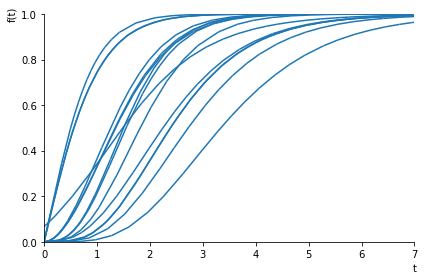

In [24]:
from sympy.plotting import plot

p1=plot(tot_op/N, xlim=(0,7),ylim=(0,1),show=False)
for op in op_ls:
    p=plot(op, xlim=(0,7),ylim=(0,1),show=False)
    p1.extend(p)
p1.show()

The verification of these exact results with Monte Carlo simulations is given in an accompanying notebook *Monte_Carlo/Compare FF with MC.ipynb* 